# First Project - Data Analysis

This project is centered around exploratory data
analysis techniques and presentation of results to a stakeholder.

**Once you start working please follow the [workflow](workflow.md) to help you achieve the tasks successfully!**

### The data

- You will use the King County Housing Data: This dataset contains information about home sales in King County (USA).
- The dataset will be provide, please copy it in the data folder where it will not be uploaded to github.
- The description of the column names can be found in the `column_names.md` file.
- The column names may NOT be clear at times:

  _In the real world we will run into similar challenges. We would then go ask our business stakeholders for more information. In this case, let us assume our business stakeholder who would give us information, left the company. Meaning we would have to identify and look up what each column names might actually mean. (google is your friend ;) )_

### The Tasks

1. Create a new repo using this [template](hhttps://github.com/neuefische/ds-eda-project-template).

2. Through EDA/statistical analysis above please come up with **AT LEAST 3 insights** regarding the overall data. One should be geographical.

3. In addition also come up with **AT LEAST 3 recommendations** for your stakeholder.

### Erin Robinson 
| Erin Robinson       | Buyer       | Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible    

In [177]:
# Formatting the column display in jupyterlabs
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 200)


# SQL query

In [178]:
# import necessary packages

import pandas as pd
import psycopg2
import os
from dotenv import load_dotenv

In [179]:
load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [180]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [181]:
# query string
query_string = "SELECT kchd.*, kchs.date, kchs.price FROM  eda.king_county_house_details kchd Full JOIN eda.king_county_house_sales kchs ON kchd.id = kchs.house_id"

In [182]:
#import the data from postgres to dataframe
df_sqlalchemy = pd.read_sql(query_string, db)

In [183]:
df_sqlalchemy.head(2)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         NaN   
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7      1180.0            0.0      1955           0.0   
1   0.0          3      7      2170.0          400.0      1951       19910.0   

   zipcode      lat     long  sqft_living15  sqft_lot15        date     price  
0    98178  47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0  
1    98125  47.7210 -122.319         1690.0      7639.0  2014-12-09  538000.0

In [184]:
# store the data in a csv-file as a raw data backup
df_sqlalchemy.to_csv('data/fulljoin_eda.csv',index=False)

# Data cleaning

### Column descriptions
* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - # of bedrooms
* bathroomsNumber - # of bathrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [185]:
# import necessary packages

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [186]:
#import the data from a csv-file if necessary
df = df_sqlalchemy.copy()
#df = pd.read_csv('data/fulljoin_eda.csv')

### Descriptive statistics

In [187]:
print(df.shape)

(21597, 21)


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [189]:
df.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007602      0.233863      3.409825      7.657915   
std        0.539683      0.086858      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21145.000000  21597.000000  17749.000000  21597.000000   
mean    1788.596842     291.857224   1970.999676    836.650516  98077.951845   
std      827.759761     442.490863     29.375234   4000.110554     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000  20150.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213983    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

### Duplicates and missing entries
* get rid of duplicates (house_id sort by date)
* check for missing entries

In [190]:
# change "date" dtype to datetime with format %Y/%m/%d 
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [191]:
# looking for an example of duplicated ids
df.sort_values('id').head(3)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
2495  1000102       6.0       3.00       2400.0    9373.0     2.0         NaN   
2494  1000102       6.0       3.00       2400.0    9373.0     2.0         NaN   
6729  1200019       4.0       1.75       2060.0   26036.0     1.0         NaN   

      view  condition  grade  sqft_above  sqft_basement  yr_built  \
2495   0.0          3      7      2400.0            0.0      1991   
2494   0.0          3      7      2400.0            0.0      1991   
6729   0.0          4      8      1160.0          900.0      1947   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
2495           0.0    98002  47.3262 -122.214         2060.0      7316.0   
2494           0.0    98002  47.3262 -122.214         2060.0      7316.0   
6729           0.0    98166  47.4444 -122.351         2590.0     21891.0   

           date     price  
2495 2015-04-22  300000.0  
2494 2014-09-16  280000.0  
6729 2014-05-08  647500.0

In [192]:
# double checking the sorting to make sure oldest dates are last 
df[df['id']==1000102].sort_values('date')['date']

2494   2014-09-16
2495   2015-04-22
Name: date, dtype: datetime64[ns]

In [193]:
# drop duplicates and keeping most recent sale, as this will be in most cases closest to the current value of houses
df = df.sort_values('date').drop_duplicates('id',keep='last')

if df.duplicated('id').nunique() == 1:
    print("There are no duplicate ID's in the dataframe left")

There are no duplicate ID's in the dataframe left


In [194]:
# double checking the duplicate that's kept
df[df['id']==1000102].sort_values('date')['date']

2495   2015-04-22
Name: date, dtype: datetime64[ns]

In [195]:
# show missing values
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2360
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     451
yr_built            0
yr_renovated     3811
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [196]:
# assuming that missing values mean not present/worst case. A
df.fillna({'waterfront': 0, 'view': 0, 'sqft_basement':0, 'yr_renovated': 0 },inplace=True)
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

### Formatting data types

In [197]:
df.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
dtype: object

In [198]:
df = df.astype({'bedrooms': int,
                'sqft_living': int,
                'sqft_lot': int,
                'view': int,
                'sqft_above': int, 
                'sqft_basement': int, 
                'yr_renovated': int, 
                'sqft_living15': int,
                'sqft_lot15': int,
                'price': int})
print(df.dtypes)

id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
dtype: object


In [199]:
df.sort_values('yr_renovated').head(5)

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
7316   2202500290         4       1.00         1450      8800     1.0   
5712   8663280080         3       2.00         1660      8174     1.0   
13453  4385701285         4       3.25         3020      4000     1.5   
9319   2621750110         4       2.50         2190      7000     2.0   
94     6021501535         3       1.50         1580      5000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
7316          0.0     0          4      7        1450              0   
5712          0.0     0          3      7         830            830   
13453         0.0     0          5      8        1920           1100   
9319          0.0     0          3      8        2190              0   
94            0.0     0          3      8        1290            290   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7316       1954             0    98006  47.5746 -122.135           1260   
5712       1981             0    98034  47.7103 -122.199           1610   
13453      1927             0    98112  47.6395 -122.279           2400   
9319       1997             0    98042  47.3718 -122.109           2040   
94         1939             0    98117  47.6870 -122.386           1570   

       sqft_lot15       date    price  
7316         8942 2014-05-02   435000  
5712         9318 2014-12-23   405000  
13453        4000 2014-12-23  1270000  
9319         7700 2014-12-23   334950  
94           4500 2014-12-23   700000

In [201]:
# create more meaningful price points
df['price_per_sqft'] = df['price'] / df['sqft_living'] # price normalized to sqft_living
df['price_per_lot'] = df['price'] / df['sqft_lot'] # price normalized to sqft_lot


### Saving cleaned up data

In [202]:
# check the shape before saving
print(df_sqlalchemy.shape)
print(df.shape)

(21597, 21)
(21420, 23)


In [203]:
#export the data to a csv-file
df.to_csv('data/clean_eda.csv',index=False)

# Load cleaned data

In [283]:
import pandas as pd

In [364]:
#import the data from a csv-file
df = pd.read_csv('data/clean_eda.csv')

In [365]:
# re-check datatypes after loading
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21420 non-null  int64  
 1   bedrooms        21420 non-null  int64  
 2   bathrooms       21420 non-null  float64
 3   sqft_living     21420 non-null  int64  
 4   sqft_lot        21420 non-null  int64  
 5   floors          21420 non-null  float64
 6   waterfront      21420 non-null  float64
 7   view            21420 non-null  int64  
 8   condition       21420 non-null  int64  
 9   grade           21420 non-null  int64  
 10  sqft_above      21420 non-null  int64  
 11  sqft_basement   21420 non-null  int64  
 12  yr_built        21420 non-null  int64  
 13  yr_renovated    21420 non-null  int64  
 14  zipcode         21420 non-null  int64  
 15  lat             21420 non-null  float64
 16  long            21420 non-null  float64
 17  sqft_living15   21420 non-null 

# Data visualization

### Hypotheses
* prize correlates with size (sqft)
* prize correlates with rating / sqft
* prize correlates with \# bedrooms 
* prize correlates with \# bathrooms
* prize correlates with condition


In [366]:
# Import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

import altair as alt
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

### Getting an overview

In [287]:
df.corr()[['price','price_per_sqft','price_per_lot']].sort_values(by='price',ascending=False) #.index

price  price_per_sqft  price_per_lot
price           1.000000        0.554108       0.306178
sqft_living     0.701295       -0.094694       0.020250
grade           0.666835        0.121372       0.216423
sqft_above      0.604424       -0.091274      -0.007010
sqft_living15   0.583792        0.035246      -0.046684
price_per_sqft  0.554108        1.000000       0.450369
bathrooms       0.525215       -0.093894       0.200768
view            0.392787        0.220379       0.076541
sqft_basement   0.321264       -0.023847       0.055075
bedrooms        0.309640       -0.207278      -0.063881
lat             0.306439        0.473097       0.290515
price_per_lot   0.306178        0.450369       1.000000
waterfront      0.264915        0.187156       0.028118
floors          0.254972        0.001515       0.477079
yr_renovated    0.118278        0.098979       0.034852
sqft_lot        0.088789       -0.035697      -0.206709
sqft_lot15      0.082045       -0.060063      -0.229096
yr_built        0.051012       -0.294758       0.122893
condition       0.034219        0.102412      -0.087555
long            0.019826       -0.240125      -0.271199
id             -0.018450       -0.006833       0.059316
zipcode        -0.051169        0.176247       0.223481

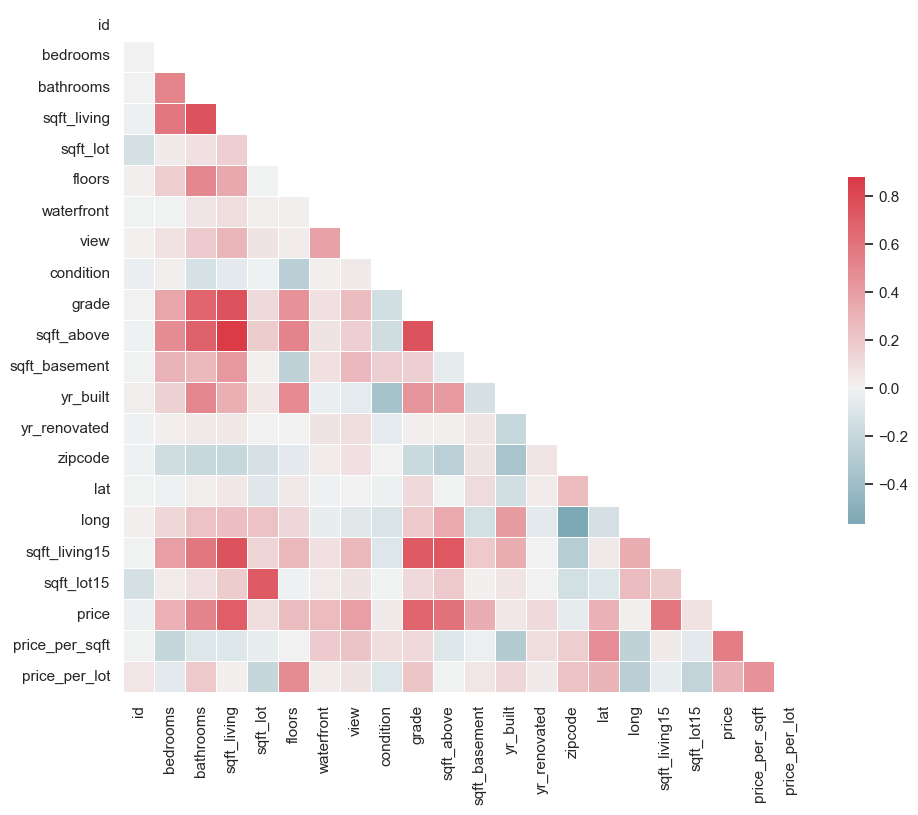

In [288]:
# matrix to get an idea of the correlations

# Set the style of the visualization
sns.set(style="white")

# Create a correlation matrix
corr = df.corr()

# Generate a mask the size of the matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

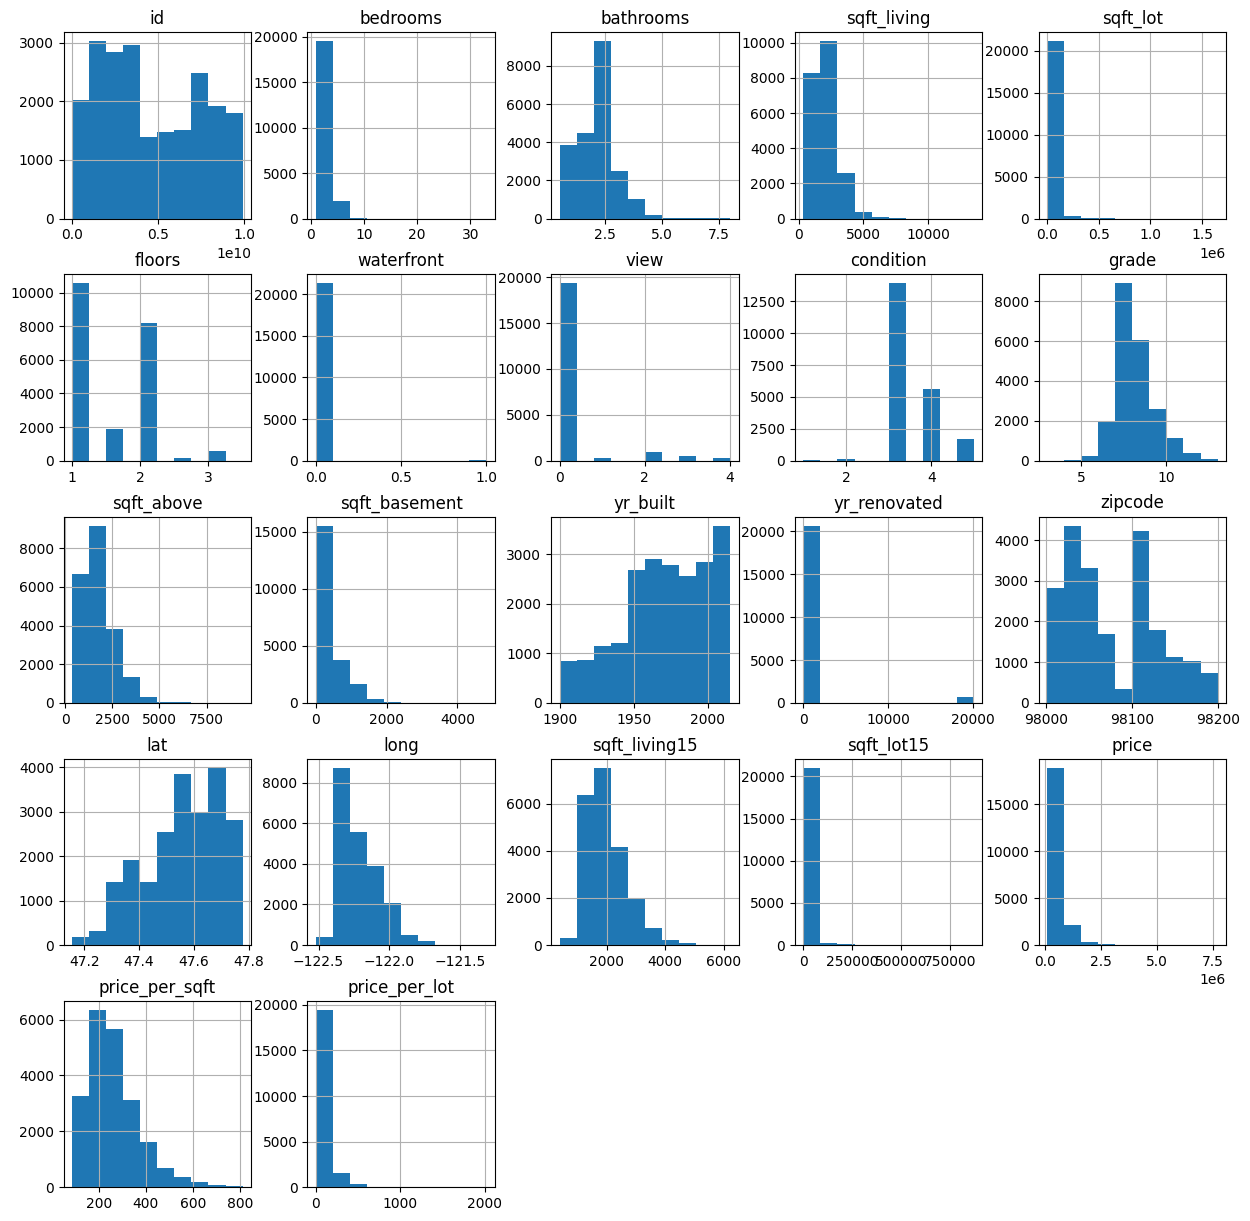

In [289]:
# Checking the distributions of continuous features
plt.style.use('default')

df[df.describe().columns].hist(figsize=(15,15));

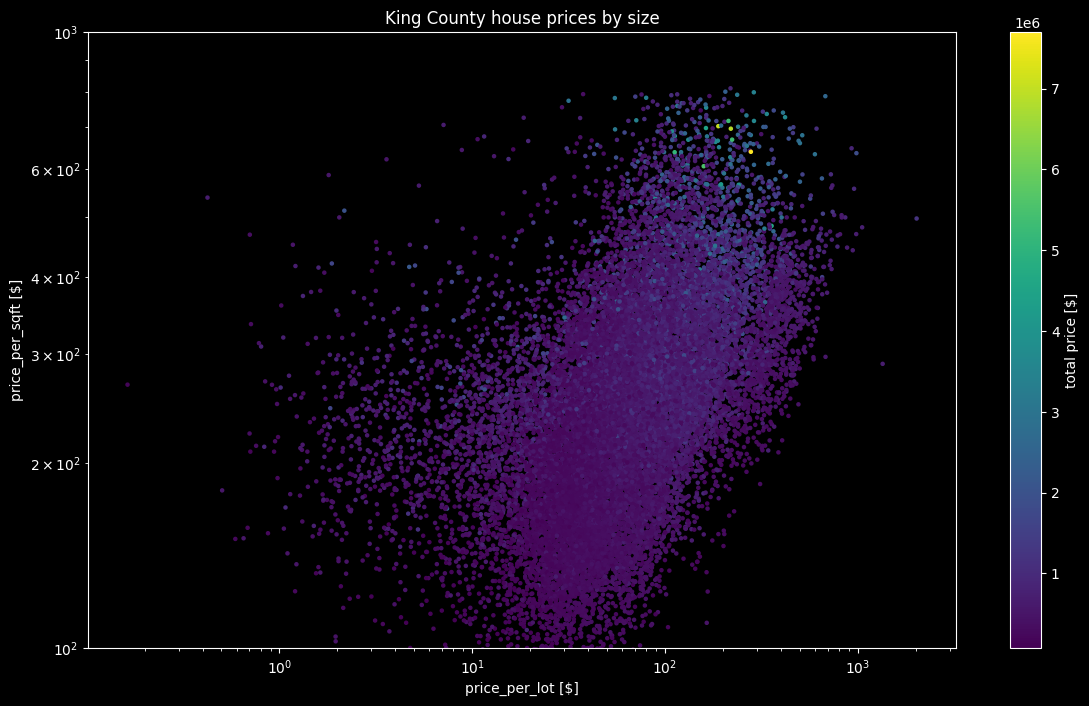

In [290]:
# prize per sqft vs price per lot size overview (colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html)

plt.style.use('dark_background')
#plt.style.use('default')


fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(x = df['price_per_lot'], y = df['price_per_sqft'], c=df['price'],cmap='viridis', s=5) # cmap='coolwarm',
plt.xlabel("price_per_lot [$]")
plt.ylabel("price_per_sqft [$]")
plt.title("King County house prices by size")
plt.colorbar(label="total price [$]")

# convert axes to Logarithmic scale
plt.yscale("log")
plt.xscale("log")

ax.set_ylim([100, 1000])

plt.show()

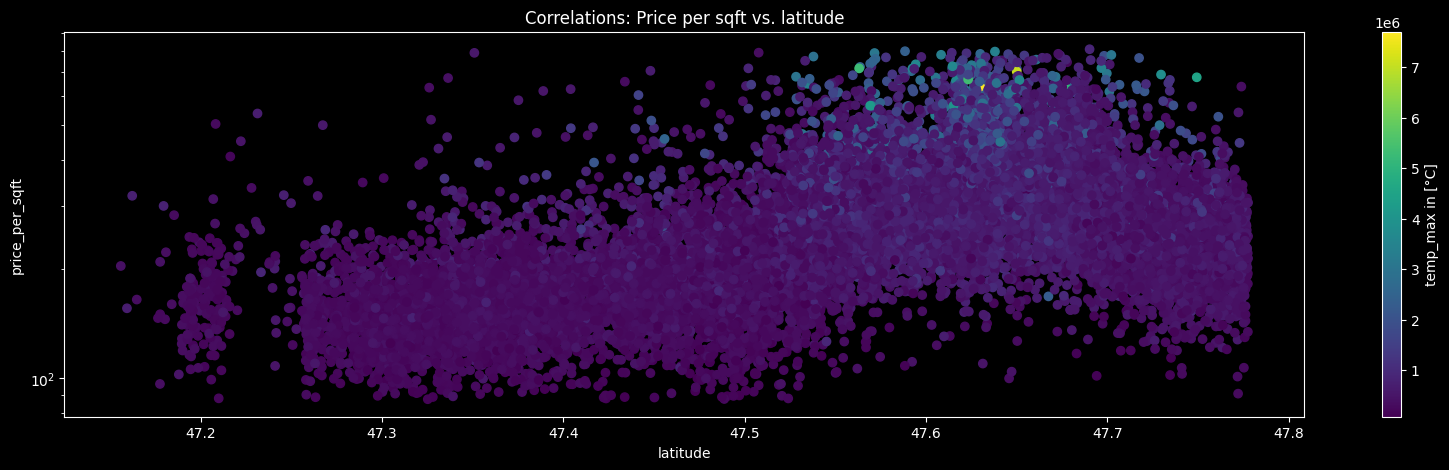

In [291]:
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# price per sqft correlates with 'price_per_sqft', 'price', 'lat', 'price_per_lot', 'zipcode', 'view','condition',

import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('dark_background')
#plt.style.use('default')


fig, ax = plt.subplots(figsize=(20,5))

plt.scatter(x = df['lat'], y = df['price_per_sqft'], c=df['price'],cmap='viridis')
plt.xlabel("latitude")
plt.ylabel("price_per_sqft")
plt.title("Correlations: Price per sqft vs. latitude")
plt.colorbar(label="temp_max in [°C]")

# convert y-axis to Logarithmic scale
plt.yscale("log")

plt.show()

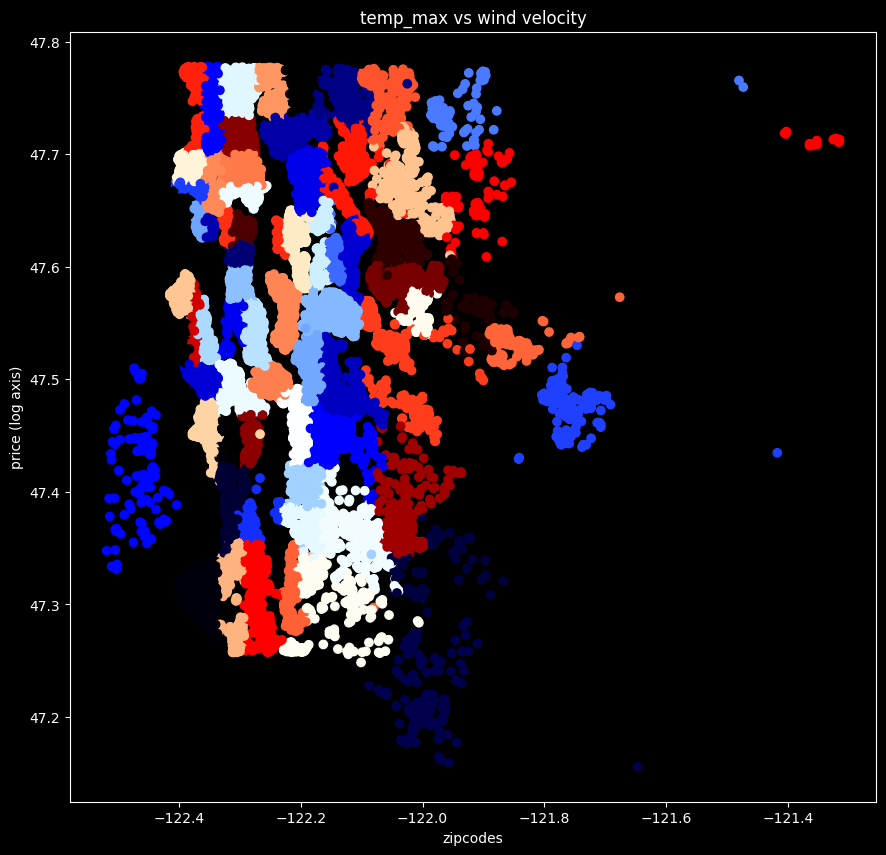

In [292]:
# get an idea of whether to use zip codes
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10.4,10))

plt.scatter(x = df['long'], y = df['lat'], c=df['zipcode'],cmap='flag') #cmap='tab20c'
plt.xlabel("zipcodes")
plt.ylabel("price (log axis)")
plt.title("temp_max vs wind velocity")

plt.show()

### Features that correlate with price 

In [293]:
print('correlation with total price:\n', df.corr()[['price','price_per_sqft','price_per_lot']].sort_values(by='price',ascending=False).head(10))
print('correlation with price per sqft:\n',df.corr()[['price','price_per_sqft','price_per_lot']].sort_values(by='price_per_sqft',ascending=False).head(10))
print('correlation with price per lot size:\n',df.corr()[['price','price_per_sqft','price_per_lot']].sort_values(by='price_per_lot',ascending=False).head(10))

correlation with total price:
                    price  price_per_sqft  price_per_lot
price           1.000000        0.554108       0.306178
sqft_living     0.701295       -0.094694       0.020250
grade           0.666835        0.121372       0.216423
sqft_above      0.604424       -0.091274      -0.007010
sqft_living15   0.583792        0.035246      -0.046684
price_per_sqft  0.554108        1.000000       0.450369
bathrooms       0.525215       -0.093894       0.200768
view            0.392787        0.220379       0.076541
sqft_basement   0.321264       -0.023847       0.055075
bedrooms        0.309640       -0.207278      -0.063881
correlation with price per sqft:
                    price  price_per_sqft  price_per_lot
price_per_sqft  0.554108        1.000000       0.450369
price           1.000000        0.554108       0.306178
lat             0.306439        0.473097       0.290515
price_per_lot   0.306178        0.450369       1.000000
view            0.392787        0.22037

In [294]:
# binning latitude to be able to plot it in a reasonable resolution

#create bin range, intervals and column name, with bins from 0 to 70 in intervals of 10:
bin_intervals = np.arange(45, 55, 0.05) 

# create the bin series e.g. for column "precipitation" ("include_lowest=True"-option includes zeros into the 0-10 bin)
df['bin_lat'] = pd.cut(df['lat'], bins=bin_intervals,labels=bin_intervals[:-1],include_lowest=True) 


In [296]:
# define data for plots
data = df.copy()

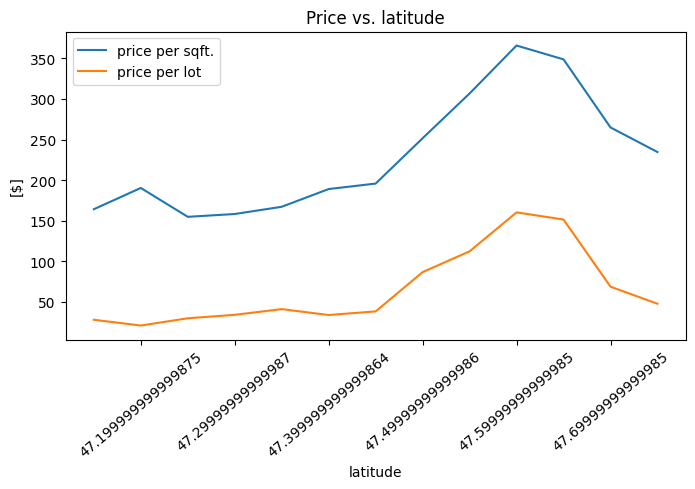

In [297]:
# latitude vs. price

plt.style.use('default')

plt.figure(figsize=(8, 4))

avg_pricePerSqft = data.groupby('bin_lat')['price_per_sqft'].agg('mean')
avg_pricePerLot = data.groupby('bin_lat')['price_per_lot'].agg('mean')
avg_pricePerSqft.plot(label='price per sqft.')
avg_pricePerLot.plot(label='price per lot')
plt.xticks(rotation=40)
plt.title('Price vs. latitude')
plt.ylabel('[$]') 
plt.xlabel('latitude') 
plt.legend()
plt.show()

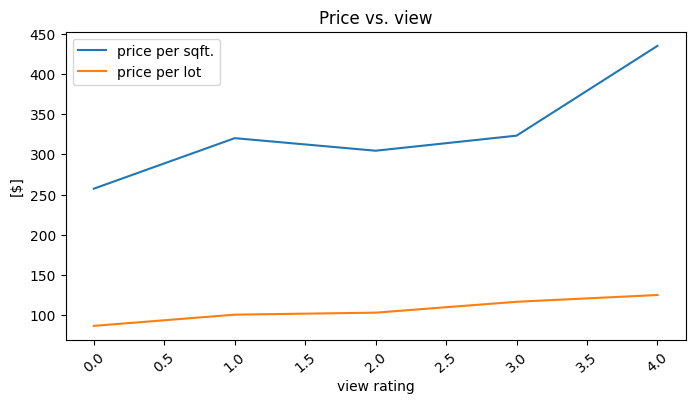

In [269]:
# view vs. price

plt.style.use('default')

plt.figure(figsize=(8, 4))

avg_pricePerSqft = data.groupby('view')['price_per_sqft'].agg('mean')
avg_pricePerLot = data.groupby('view')['price_per_lot'].agg('mean')
avg_pricePerSqft.plot(label='price per sqft.')
avg_pricePerLot.plot(label='price per lot')
plt.xticks(rotation=40)
plt.title('Price vs. view')
plt.ylabel('[$]') 
plt.xlabel('view rating') 
plt.legend()
plt.show()

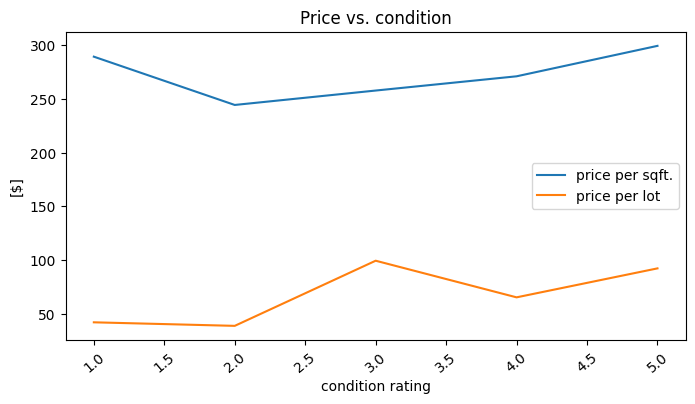

In [273]:
# condition vs. price

plt.style.use('default')

plt.figure(figsize=(8, 4))

avg_pricePerSqft = data.groupby('condition')['price_per_sqft'].agg('mean')
avg_pricePerLot = data.groupby('condition')['price_per_lot'].agg('mean')
avg_pricePerSqft.plot(label='price per sqft.')
avg_pricePerLot.plot(label='price per lot')
plt.xticks(rotation=40)
plt.title('Price vs. condition')
plt.ylabel('[$]') 
plt.xlabel('condition rating') 
plt.legend()
plt.show()

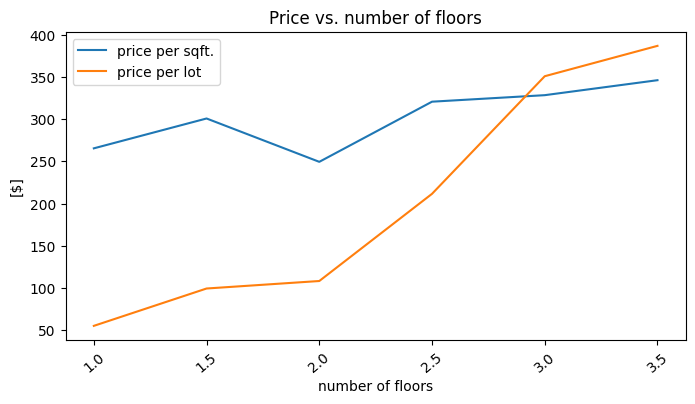

In [272]:
# number of floors vs. price

plt.style.use('default')

plt.figure(figsize=(8, 4))

avg_pricePerSqft = data.groupby('floors')['price_per_sqft'].agg('mean')
avg_pricePerLot = data.groupby('floors')['price_per_lot'].agg('mean')
avg_pricePerSqft.plot(label='price per sqft.')
avg_pricePerLot.plot(label='price per lot')
plt.xticks(rotation=40)
plt.title('Price vs. number of floors')
plt.ylabel('[$]') 
plt.xlabel('number of floors') 
plt.legend()
plt.show()

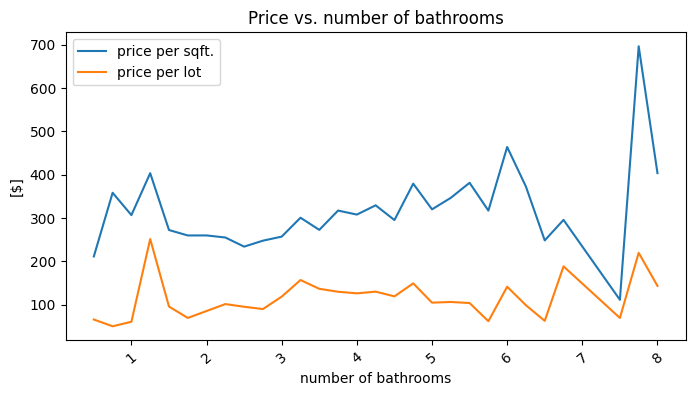

In [271]:
#bathrooms vs. price

plt.style.use('default')

plt.figure(figsize=(8, 4))

avg_pricePerSqft = data.groupby('bathrooms')['price_per_sqft'].agg('mean')
avg_pricePerLot = data.groupby('bathrooms')['price_per_lot'].agg('mean')
avg_pricePerSqft.plot(label='price per sqft.')
avg_pricePerLot.plot(label='price per lot')
plt.xticks(rotation=40)
plt.title('Price vs. number of bathrooms')
plt.ylabel('[$]') 
plt.xlabel('number of bathrooms') 
plt.legend()
plt.show()

### Maps

In [379]:
print('latitude', df['lat'].min(), 'to ', df['lat'].max())
print('longitude', df['long'].min(), 'to ', df['long'].max())

location_kc=[df_small['lat'].mean(),df_small['long'].mean()]
location_kc_median=[df_small['lat'].median(),df_small['long'].median()]

print('mean:', location_kc)
print('median:', location_kc_median)

latitude 47.1559 to  47.7776
longitude -122.519 to  -121.315
mean: [47.5883, -122.20538499999999]
median: [47.6192, -122.2305]


In [381]:
# first test map with 200 houses

df_small = df.head(200)

map_ = folium.Map(location_kc_median, tiles='openstreetmap', zoom_start=11)

for idx, row in df_small.iterrows():
    Marker([row['lat'], row['long']], icon=folium.Icon(color='blue', icon='home', prefix='fa')).add_to(map_)

map_

In [399]:
# volcano heatmaps for pricy areas

df2 = df[df['price_per_sqft']>=df['price_per_sqft'].median()*2.2].copy()

location_kc=[df['lat'].mean(),df['long'].mean()]


from folium import plugins

map = folium.Map(location_kc_median, tiles="Cartodb dark_matter", zoom_start=12)

heat_data = [[row['lat'],row['long']] for index, row in df2.iterrows()]



heat_data
plugins.HeatMap(heat_data, radius = 15, min_opacity=0.4, blur = 8).add_to(map) # radius = 10, min_opacity=0.3, blur = 35

m = map

m

In [398]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

#df2 = df_clean.sort_values(by='price', ascending=False).head(200).copy()
df2 = df[df['price_per_sqft']>=df['price_per_sqft'].median()*2.5].copy()


from folium import plugins

map = folium.Map(location_kc_median, tiles="Cartodb dark_matter", zoom_start=12)

heat_data = [[row['lat'],row['long']] for index, row in df2.iterrows()]



heat_data
plugins.HeatMap(heat_data).add_to(map)

m = map

m

In [478]:
# plotting low priced houses

df_cheap_houses = df[(df['price_per_lot']<=df['price_per_lot'].median()) & (df['price_per_sqft']<=df['price_per_sqft'].median())].copy()

# resetting centering on data subset
location_cheap=[df_small['lat'].mean(),df_small['long'].mean()]

df2 = df_low_houses.sort_values(by='price').head(10000)

map_ = folium.Map(location_cheap, tiles='openstreetmap', zoom_start=11)

for i in range(0,len(df_cheap_houses)):
    Circle(
        location=[df_cheap_houses.iloc[i]['lat'], df_cheap_houses.iloc[i]['long']],
        radius=20,
        color='green').add_to(map_)

map_


# Selection of suitable houses

### Assumptions 
* Erin Robinson  invests in poor neighborhoods, is buying & selling, aims for costs back + little profit, wants to be socially responsible
    * many bedrooms/bathrooms/floors are important for multiple families if they don't want to build new
    * House should be close to city center
    * sqft living is important
    * sqft_lot is important for building new  
    * looks for houses for multiple families (floors/bedrooms/bathrooms/sqft)
    * does not necessary need luxury
    * condition/renovation date should be as good as possible

In [409]:
lot_limit = df['price_per_lot'].median()
lot_limit

59.54772703482402

In [447]:
# selection of interesting houses IN GOOD CONDITION, 3 BEDROOMS, 3 BATHROOMS, LOW Priced
sqft_limit = df['price_per_sqft'].median()/1.5
lot_limit = df['price_per_lot'].median()/1.5
condition_limit = df['condition'].median()/1.5
bedrooms_limit =  3 #df_clean['bedrooms'].mean()
bathrooms_limit =  3 #df_clean['bathrooms'].mean()


In [486]:

df_selection=df[(df['price_per_sqft']<=sqft_limit) & (df['price_per_lot']<=lot_limit) & (df['condition']<=condition_limit) & (df['bedrooms']<=bedrooms_limit) & (df['bathrooms']<=bathrooms_limit)]

print( f'We selected {df_selection.shape[0]} houses with good value')


We selected 45 houses with good value


In [480]:
map_ = folium.Map(location_kc_median, tiles='openstreetmap', zoom_start=11)

for idx, row in df_selection.iterrows():
    Marker([row['lat'], row['long']], icon=folium.Icon(color='blue', icon='home', prefix='fa')).add_to(map_)

map_

In [ ]:
df_cheap_inner_city = df_selection[(df_selection['lat']>=lat_min_limit) & (df_selection['lat']<=lat_max_limit)].copy()
df_cheap_inner_city = df[(df['lat']>=lat_min_limit) & (df['lat']<=lat_max_limit)].copy()

In [487]:
df_inner_city.shape[0]

12959

latitude 47.1559 to  47.7776
longitude -122.519 to  -121.315


47.1559

47.66889864845939

In [469]:
#df_inner_city = df_selection[(df_selection['lat']>=lat_min_limit) & (df_selection['lat']<=lat_max_limit)].copy()
df_inner_city = df[(df['lat']>=lat_min_limit) & (df['lat']<=lat_max_limit)].copy()

(12959, 23)